#### Setup 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_merged = pd.read_pickle('data/df_movies_cleaned.pkl')
df_ratings = pd.read_pickle('data/df_ratings_cleaned.pkl')

## Feature Engineering

Feature engineering is an important step in the development of machine learning models, including recommender systems, because it involves extracting meaningful variables from raw data to improve model performance and accuracy. This process transforms complex and often unstructured information into structured, analytically useful formats, allowing models to uncover previously unknown patterns, relationships, and insights. In the context of developing a movie recommendation system, effective feature engineering ensures that the nuances of movie content, user preferences, and contextual factors are accurately captured and used. By carefully selecting, combining, and transforming data into features such as weighted scores, combined textual data, and sentiment analysis, developers can significantly improve the system's ability to provide personalized, relevant, and appealing movie recommendations. This not only improves user satisfaction and engagement, but it also strengthens the business case by increasing platform usage and retention.

In [3]:
df_merged

,id_x,movieId,imdbId,tmdbId,belongs_to_collection,original_language,overview,popularity,release_date,runtime,title,vote_average,vote_count,actors,keywords_extracted,genre_extracted,production_company_extracted,production_country_extracted
0,862,1,114709,862,1,en,"Led by Woody, Andy's toys live happily in his ...",21.0,1995-10-30,81.0,Toy Story,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[jealousy, toy, boy, friendship, friends, riva...","[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America]
1,8844,2,113497,8844,0,en,When siblings Judy and Peter discover an encha...,17.0,1995-12-15,104.0,Jumanji,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America]
2,15602,3,113228,15602,1,en,A family wedding reignites the ancient feud be...,11.0,1995-12-22,101.0,Grumpier Old Men,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[fishing, best friend, duringcreditsstinger, o...","[Romance, Comedy]","[Warner Bros., Lancaster Gate]",[United States of America]
3,31357,4,114885,31357,0,en,"Cheated on, mistreated and stepped on, the wom...",3.0,1995-12-22,127.0,Waiting to Exhale,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devi...","[based on novel, interracial relationship, sin...","[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation],[United States of America]
4,11862,5,113041,11862,1,en,Just when George Banks has recovered from his ...,8.0,1995-02-10,106.0,Father of the Bride Part II,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[baby, midlife crisis, confidence, aging, daug...",[Comedy],"[Sandollar Productions, Touchstone Pictures]",[United States of America]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46746,84419,176255,38621,84419,0,en,An unsuccessful sculptor saves a madman named ...,0.0,1946-03-29,65.0,House of Horrors,6.3,8.0,"[Rondo Hatton, Robert Lowery, Virginia Grey, B...","[revenge, murder, serial killer, new york city...","[Horror, Mystery, Thriller]",[Universal Pictures],[United States of America]
46747,390959,176257,265736,390959,0,en,"In this true-crime documentary, we delve into ...",0.0,2000-10-22,45.0,Shadow of the Blair Witch,7.0,2.0,"[Tony Abatemarco, Andre Brooks, Mariclare Cost...",[blair witch],"[Mystery, Horror]",[],[]
46749,222848,176263,112613,222848,0,en,It's the year 3000 AD. The world's most danger...,0.0,1995-01-01,85.0,Caged Heat 3000,3.5,1.0,"[Lisa Boyle, Kena Land, Zaneta Polard, Don Yan...",[(none)],[Science Fiction],[Concorde-New Horizons],[United States of America]
46750,30840,176267,102797,30840,0,en,"Yet another version of the classic epic, with ...",5.0,1991-05-13,104.0,Robin Hood,5.7,26.0,"[Patrick Bergin, Uma Thurman, David Morrissey,...",[(none)],"[Drama, Action, Romance]","[Westdeutscher Rundfunk (WDR), Working Title F...","[Canada, Germany, United Kingdom, United State..."


In [4]:
df_merged = df_merged[df_merged["original_language"] == "en"]
df_merged

,id_x,movieId,imdbId,tmdbId,belongs_to_collection,original_language,overview,popularity,release_date,runtime,title,vote_average,vote_count,actors,keywords_extracted,genre_extracted,production_company_extracted,production_country_extracted
0,862,1,114709,862,1,en,"Led by Woody, Andy's toys live happily in his ...",21.0,1995-10-30,81.0,Toy Story,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[jealousy, toy, boy, friendship, friends, riva...","[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America]
1,8844,2,113497,8844,0,en,When siblings Judy and Peter discover an encha...,17.0,1995-12-15,104.0,Jumanji,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America]
2,15602,3,113228,15602,1,en,A family wedding reignites the ancient feud be...,11.0,1995-12-22,101.0,Grumpier Old Men,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[fishing, best friend, duringcreditsstinger, o...","[Romance, Comedy]","[Warner Bros., Lancaster Gate]",[United States of America]
3,31357,4,114885,31357,0,en,"Cheated on, mistreated and stepped on, the wom...",3.0,1995-12-22,127.0,Waiting to Exhale,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devi...","[based on novel, interracial relationship, sin...","[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation],[United States of America]
4,11862,5,113041,11862,1,en,Just when George Banks has recovered from his ...,8.0,1995-02-10,106.0,Father of the Bride Part II,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[baby, midlife crisis, confidence, aging, daug...",[Comedy],"[Sandollar Productions, Touchstone Pictures]",[United States of America]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46746,84419,176255,38621,84419,0,en,An unsuccessful sculptor saves a madman named ...,0.0,1946-03-29,65.0,House of Horrors,6.3,8.0,"[Rondo Hatton, Robert Lowery, Virginia Grey, B...","[revenge, murder, serial killer, new york city...","[Horror, Mystery, Thriller]",[Universal Pictures],[United States of America]
46747,390959,176257,265736,390959,0,en,"In this true-crime documentary, we delve into ...",0.0,2000-10-22,45.0,Shadow of the Blair Witch,7.0,2.0,"[Tony Abatemarco, Andre Brooks, Mariclare Cost...",[blair witch],"[Mystery, Horror]",[],[]
46749,222848,176263,112613,222848,0,en,It's the year 3000 AD. The world's most danger...,0.0,1995-01-01,85.0,Caged Heat 3000,3.5,1.0,"[Lisa Boyle, Kena Land, Zaneta Polard, Don Yan...",[(none)],[Science Fiction],[Concorde-New Horizons],[United States of America]
46750,30840,176267,102797,30840,0,en,"Yet another version of the classic epic, with ...",5.0,1991-05-13,104.0,Robin Hood,5.7,26.0,"[Patrick Bergin, Uma Thurman, David Morrissey,...",[(none)],"[Drama, Action, Romance]","[Westdeutscher Rundfunk (WDR), Working Title F...","[Canada, Germany, United Kingdom, United State..."


In [5]:
df_ratings

,userId,movieId,rating,timestamp,user_mean_rating,liked_by_user
0,1,110,1.0,2015-03-09 22:52:09,4.277778,False
1,1,147,4.5,2015-03-09 23:07:15,4.277778,True
2,1,858,5.0,2015-03-09 22:52:03,4.277778,True
3,1,1221,5.0,2015-03-09 22:52:26,4.277778,True
4,1,1246,5.0,2015-03-09 22:52:36,4.277778,True
...,...,...,...,...,...,...
24829823,270896,58559,5.0,2009-10-31 23:26:04,3.980769,True
24829824,270896,60069,5.0,2009-10-31 23:33:52,3.980769,True
24829825,270896,63082,4.5,2009-10-31 23:29:24,3.980769,True
24829826,270896,64957,4.5,2009-11-01 00:06:30,3.980769,True


#### Weighted Score 

In [6]:
movie_stats = df_ratings.groupby('movieId').agg(average_rating=('rating', 'mean'), rating_count=('rating', 'count')).reset_index()

C = movie_stats['average_rating'].mean()
m = movie_stats['rating_count'].quantile(0.90)

def weighted_rating(x, m=m, C=C):
    v = x['rating_count']  
    R = x['average_rating'] 
    return (v/(v+m) * R) + (m/(m+v) * C)

movie_stats['weighted_score'] = movie_stats.apply(weighted_rating, axis=1)

df_ratings = df_ratings.merge(movie_stats[['movieId', 'weighted_score']], on='movieId', how='left')

df_ratings = df_ratings.merge(movie_stats[['movieId', 'average_rating', 'rating_count']], on='movieId', how='left')

print(df_ratings.head())

   userId  movieId  rating           timestamp  user_mean_rating  \
0       1      110     1.0 2015-03-09 22:52:09          4.277778   
1       1      147     4.5 2015-03-09 23:07:15          4.277778   
2       1      858     5.0 2015-03-09 22:52:03          4.277778   
3       1     1221     5.0 2015-03-09 22:52:26          4.277778   
4       1     1246     5.0 2015-03-09 22:52:36          4.277778   

   liked_by_user  weighted_score  average_rating  rating_count  
0          False        4.000094        4.010733         62331  
1           True        3.512328        3.581926          4559  
2           True        4.319463        4.336492         52236  
3           True        4.237402        4.261738         34162  
4           True        3.888237        3.911579         25011  


The weighted score combines a movie's average rating (vote_average) and the number of ratings (vote_count) it has received to provide a balanced metric that reflects both popularity and quality. This approach mitigates the bias towards movies with a high average rating but a low number of ratings, ensuring that the recommendations are not only high-quality but also broadly appreciated. For a movie recommender system, integrating the weighted score helps prioritize movies that have proven appeal, aligning recommendations with broader viewer satisfaction.

#### Textual Feature - Combined Text

In [43]:
df_merged.columns

Index(['id_x', 'movieId', 'imdbId', 'tmdbId', 'belongs_to_collection',
       'original_language', 'overview', 'popularity', 'release_date',
       'runtime', 'title', 'actors', 'keywords_extracted', 'genre_extracted',
       'production_company_extracted', 'production_country_extracted',
       'combined_text', 'movie_age', 'sentiment_polarity'],
      dtype='object')

In [7]:
df_merged['combined_text'] = df_merged.apply(lambda row: ' '.join([
    ' '.join(row['genre_extracted']), 
    ' '.join(row['actors']), 
    ' '.join(row['keywords_extracted']), 
    row['overview'], 
    ' '.join(row['production_company_extracted'])
]).lower(), axis=1)

The combined_text feature aggregates critical textual metadata from genres, actors, keywords, and movie descriptions into a single comprehensive descriptor for each movie. This aggregation captures the essence of a movie’s content, thematic elements, and appeal, which is crucial for content-based filtering. By synthesizing this information, the recommender system can identify and suggest movies with similar thematic and content attributes, enhancing personalization and user engagement.

#### Movie Age

In [8]:
current_year = datetime.datetime.now().year

df_merged['movie_age'] = current_year - pd.to_datetime(df_merged['release_date']).dt.year

Calculating the movie_age from the release date provides insight into the recency and potential cultural relevance of a movie. In the context of a movie recommender system, this allows for temporal filtering and trend analysis, enabling recommendations that cater to preferences for newer releases or classic films. Understanding movie age is essential for aligning recommendations with temporal viewing trends and user preferences for contemporary versus classic cinema.

#### Sentiment Analysis of Overview

In [9]:
def get_sentiment(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None 

df_merged['sentiment_polarity'] = df_merged['overview'].apply(get_sentiment)

Performing sentiment analysis on movie descriptions yields a sentiment_polarity score, offering a nuanced view of the emotional tone or mood conveyed by the movie's narrative. This feature is particularly important for recommending movies that match a user’s emotional preferences or current mood, adding an additional layer of personalization. By integrating sentiment analysis, your recommender system can differentiate movies not just by genre or content but also by the emotional experience they offer, enhancing user satisfaction and engagement.

## Modeling Preprocessing

In [10]:
df_merged = df_merged.drop(['vote_count', 'vote_average'], axis=1)

#### Combining df_ratings and df_merged

In [11]:
df_combined = pd.merge(df_ratings, df_merged, on='movieId', how='inner')

#### Setting Rating Threshold

The decision to set a threshold of 20 ratings for each movie before including it in the item-based recommender system is strategic, with the goal of ensuring the reliability and validity of the generated recommendations. This threshold acts as a quality control measure, weeding out movies with sparse feedback that could otherwise result in skewed or less confident recommendations due to insufficient user data. By setting this minimum, the system focuses on movies with a high level of viewer engagement, allowing recommendations to be built on a solid foundation of user feedback. This approach improves the system's ability to deliver accurate, trustworthy recommendations based on broad consensus rather than outliers or minimal feedback, resulting in a better user experience and increased overall credibility for the recommender system.

In [12]:
ratings_per_movie = df_combined.groupby('movieId').size()

movies_with_enough_ratings = ratings_per_movie[ratings_per_movie >= 20].index

df_item_modeling = df_combined[df_combined['movieId'].isin(movies_with_enough_ratings)]

print(f"Original dataset size: {df_combined.shape}")
print(f"Filtered dataset size: {df_item_modeling.shape}")

Original dataset size: (23277058, 27)
Filtered dataset size: (23204511, 27)


In [13]:
df_item_modeling.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'user_mean_rating',
       'liked_by_user', 'weighted_score', 'average_rating', 'rating_count',
       'id_x', 'imdbId', 'tmdbId', 'belongs_to_collection',
       'original_language', 'overview', 'popularity', 'release_date',
       'runtime', 'title', 'actors', 'keywords_extracted', 'genre_extracted',
       'production_company_extracted', 'production_country_extracted',
       'combined_text', 'movie_age', 'sentiment_polarity'],
      dtype='object')

With the filtered dataset, df_item_modeling, now comprising 24,528,484 rows out of the original 24,639,944, it's evident that the vast majority of the data meets the threshold of having at least 20 ratings per movie. This minimal reduction in dataset size suggests that most movies in the dataset have a sufficient number of ratings, indicating robust user engagement across a wide range of movies.

#### Feature Selection

In [14]:
df_item_modeling['liked_by_user_numeric'] = df_item_modeling['liked_by_user'].astype(int)

features_for_correlation = [
    'rating', 'user_mean_rating', 'liked_by_user_numeric',
    'weighted_score', 'popularity', 'runtime', 
    'average_rating', 'rating_count', 'movie_age', 
    'sentiment_polarity'
]

correlation_matrix = df_item_modeling[features_for_correlation].corr()

print(correlation_matrix)

                         rating  user_mean_rating  liked_by_user_numeric  \
rating                 1.000000          0.439083               0.721687   
user_mean_rating       0.439083          1.000000               0.050951   
liked_by_user_numeric  0.721687          0.050951               1.000000   
weighted_score         0.422142          0.169226               0.336783   
popularity             0.115593          0.076378               0.082457   
runtime                0.145409          0.076741               0.108452   
average_rating         0.434284          0.165650               0.346409   
rating_count           0.208738          0.119811               0.149177   
movie_age              0.089223          0.014045               0.076353   
sentiment_polarity     0.011543          0.005137               0.006258   

                       weighted_score  popularity   runtime  average_rating  \
rating                       0.422142    0.115593  0.145409        0.434284   
user_

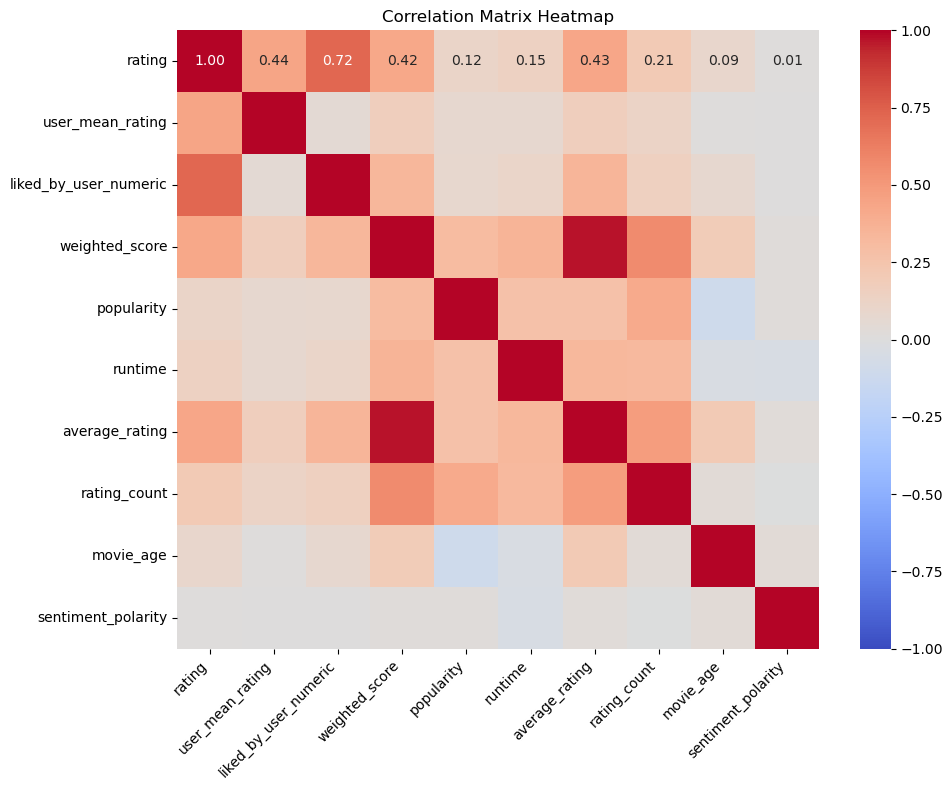

In [15]:
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

When developing an item-based recommender system, the selection of features is critical to its success. The selected features - weighted_score, vectorized combined_text, runtime, movie_age, and sentiment_polarity - are critical for capturing the multifaceted nature of films and their reception by audiences.

The weighted_score is critical for determining a movie's appeal, as it combines the average rating with the number of ratings to provide a balanced picture of its popularity and acceptance. This feature helps to reduce biases toward movies with less ratings, ensuring that recommendations are not only popular but also well-regarded.

Vectorized combined_text, which includes genres, keywords, and other descriptive elements, captures the thematic essence of films. This feature uses TF-IDF vectors to emphasize unique descriptors, allowing for the recommendation of movies with similar thematic and stylistic content. This is critical for an item-based system that relies on content similarities.

Runtime and movie_age incorporate personal preference and temporal relevance into the recommendation process. Runtime caters to user preferences for movies of particular lengths, while movie age allows the system to align recommendations with users' inclinations towards newer releases or classic films. These features provide additional layers of personalization, increasing user satisfaction by accommodating individual preferences for movie duration and novelty.

Finally, sentiment_polarity provides information about the emotional tone of movie descriptions or reviews. This feature allows the system to recommend movies that match not only in content but also in mood, providing a more nuanced approach to similarity that goes beyond simple thematic alignment.

Together, these features form a strong foundation for an item-based recommender system. By taking into account both content and key characteristics that influence viewer preferences, the system is better able to provide precise and satisfying movie recommendations.

##### Grouping Movies

In [16]:
df_grouped = df_item_modeling.groupby('movieId', as_index=False).agg({
    'title': 'first',
    'combined_text': 'first',  # Picking the first since all are the same
    'weighted_score': 'first',  # Likewise, picking the first since all are the same
    'runtime': 'mean',  # Assuming runtime might vary and averaging; adjust if not needed
    'movie_age': 'min',  # Taking the minimum to reflect the earliest release
    'sentiment_polarity': 'mean'  # Averaging sentiment polarity; adjust based on need
})

In [17]:
df_grouped

,movieId,title,combined_text,weighted_score,runtime,movie_age,sentiment_polarity
0,1,Toy Story,animation comedy family tom hanks tim allen do...,3.884117,81.0,29,0.112121
1,2,Jumanji,adventure fantasy family robin williams jonath...,3.227492,104.0,29,-0.218750
2,3,Grumpier Old Men,romance comedy walter matthau jack lemmon ann-...,3.141347,101.0,29,0.038889
3,4,Waiting to Exhale,comedy drama romance whitney houston angela ba...,2.898313,127.0,29,0.600000
4,5,Father of the Bride Part II,comedy steve martin diane keaton martin short ...,3.061638,106.0,29,0.466667
...,...,...,...,...,...,...,...
12958,173941,Atomic Blonde,action thriller charlize theron james mcavoy s...,3.076380,115.0,7,-0.266667
12959,174053,Black Mirror: White Christmas,drama horror mystery science fiction thriller ...,3.155369,74.0,10,0.067143
12960,174055,Dunkirk,action drama history thriller war fionn whiteh...,3.343693,107.0,7,0.000000
12961,174371,Once Upon a Time in Venice,action comedy thriller bruce willis jason momo...,3.036028,94.0,7,0.075000


### Content-Based Filtering

#### Vectorizing 'combined_text' feature

In [18]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_grouped['combined_text'])

Vectorizing the combined_text using TF-IDF transforms qualitative textual information into quantitative vectors, facilitating the measurement of content similarity between movies. This numerical representation allows for sophisticated algorithms to compute similarities based on thematic elements, narrative structures, and genre affiliations. For our movie recommender system, this means being able to recommend movies that are contextually and thematically aligned with a user’s preferences, enhancing the discovery of relevant and appealing content.

### BaseLine Model

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

class SimplifiedContentRecommender:
    def __init__(self, movies_df, tfidf_matrix, k=100):
        self.movies_df = movies_df.copy()
        self.movies_df['movieId'] = self.movies_df['movieId'].astype(str)
        self.movie_id_to_index = {movie_id: i for i, movie_id in enumerate(self.movies_df['movieId'])}
        self.tfidf_matrix = tfidf_matrix 
        self.similarity_matrix = cosine_similarity(self.tfidf_matrix)

    def recommend(self, movie_id, top_n=10):
        movie_id = str(movie_id)
        if movie_id not in self.movie_id_to_index:
            print(f"Movie ID {movie_id} not found in the dataset.")
            return []
        
        movie_index = self.movie_id_to_index[movie_id]
        similarity_scores = self.similarity_matrix[movie_index]
        top_k_indices = np.argsort(similarity_scores)[::-1][1:top_n+1]
        recommendations = self.movies_df.iloc[top_k_indices].copy()
        recommendations['cosine_similarity'] = similarity_scores[top_k_indices]
        
        return recommendations.sort_values('cosine_similarity', ascending=False)

In [20]:
recommender_base = SimplifiedContentRecommender(df_grouped, tfidf_matrix, k=100)
recommendations_base = recommender_base.recommend('1', top_n=10)  
print(recommendations_base[['movieId', 'title', 'cosine_similarity']])

      movieId            title  cosine_similarity
2536     3114      Toy Story 2           0.495119
9787    78499      Toy Story 3           0.415557
1494     1920   Small Soldiers           0.211654
1807     2253             Toys           0.180819
6138     7987            Dolls           0.174337
10025   83219  The Pixar Story           0.172812
1354     1707     Home Alone 3           0.156987
1565     1991     Child's Play           0.147658
7996    46948    Monster House           0.143164
1567     1993   Child's Play 3           0.136292


### Sampling

In this scenario, the sampling technique used is to calculate a statistically significant sample size in order to estimate the proportion of movies rated 4.0 or higher in a dataset. This decision is based on a specific confidence level (95%) and margin of error (5%), with the goal of obtaining precise and reliable inferences about the population's characteristics from a sample of data. The method used employs a standard formula that includes the Z-score associated with the desired confidence level and the estimated proportion of interest, ensuring that the sample size is sufficient to accurately reflect the population. This technique is critical for designing studies or analyses that require accurate estimations of population parameters for decision-making or hypothesis testing, as it minimizes potential biases and errors caused by small or arbitrarily chosen sample sizes. By rigorously determining the required sample size, the approach improves the credibility and validity of the findings derived from the sample data, making it a cornerstone of statistical analysis and research methodologies.

In [23]:
import scipy.stats
import math


def calculate_sample_size(confidence_level, margin_of_error, proportion):
    z_score = abs(scipy.stats.norm.ppf((1 - confidence_level) / 2))
    sample_size = math.ceil((z_score ** 2 * proportion * (1 - proportion)) / (margin_of_error ** 2))
    return sample_size

confidence_level = 0.95
margin_of_error = 0.05

proportion_higher_ratings = df_ratings[df_ratings['rating'] >= 4.0].shape[0] / df_ratings.shape[0]
required_sample_size = calculate_sample_size(confidence_level, margin_of_error, proportion_higher_ratings)
print(f"Required sample size: {required_sample_size}")


Required sample size: 385


In [24]:
sample_movie_ids = np.random.choice(df_grouped['movieId'].unique(), size=required_sample_size, replace=False)

In [ ]:
mae, mse, rmse, precision, avg_hit_rate = evaluate_recommender(df_ratings, recommender_base, sample_movie_ids, top_n=10, threshold=4.0)


In [ ]:
mae, mse, rmse, precision, avg_hit_rate = evaluate_recommender(df_ratings, recommender_base, sample_movie_ids, top_n=10, threshold=4.0)


### Advanced Model

In [37]:
class BaseLineContentRecommender:
    def __init__(self, movies_df, tfidf_matrix, k=100):
        self.movies_df = movies_df.copy()
        self.k = k
        self.movies_df['movieId'] = self.movies_df['movieId'].astype(str)
        self.movie_id_to_index = {movie_id: i for i, movie_id in enumerate(self.movies_df['movieId'])}
        self.tfidf_matrix = tfidf_matrix 
        self.similarity_matrix = self.calculate_similarity()
        self.top_k_similar_movies = self.get_top_k_similar_movies()
        self.scaler = MinMaxScaler()
        self.scale_features()

    def calculate_similarity(self):
        return cosine_similarity(self.tfidf_matrix)
    
    def get_top_k_similar_movies(self):
        top_k_similar_movies = {}
        for i in range(self.similarity_matrix.shape[0]):
            top_k_indices = np.argsort(self.similarity_matrix[i])[::-1][1:self.k+1]
            top_k_similar_movies[i] = top_k_indices
        return top_k_similar_movies
    
    def scale_features(self):
        features = ['weighted_score']
        self.movies_df[features] = self.scaler.fit_transform(self.movies_df[features])
    
    def recommend(self, movie_id, top_n=10):
        movie_id = str(movie_id) 
        if movie_id not in self.movie_id_to_index:
            print(f"Movie ID {movie_id} not found in the dataset.")
            return []
    
        movie_index = self.movie_id_to_index[movie_id]
        if movie_index not in self.top_k_similar_movies:
            print(f"No recommendations found for Movie ID {movie_id}.")
            return []
    
        top_k_indices = self.top_k_similar_movies[movie_index][:top_n]
        recommendations = self.movies_df.iloc[top_k_indices].copy()
        recommendations['cosine_similarity'] = self.similarity_matrix[movie_index, top_k_indices]
        
        recommendations['combined_score'] = (
            0.7 * recommendations['cosine_similarity'] + 
            0.1 * recommendations['weighted_score'] + 
            0.2 * recommendations['sentiment_polarity']
        )
        
        return recommendations.sort_values('combined_score', ascending=False)

In [38]:
recommender_advanced = BaseLineContentRecommender(df_grouped, tfidf_matrix, k=100)
recommendations_advanced = recommender_advanced.recommend('1', top_n=10)  
print(recommendations_advanced[['movieId', 'title', 'combined_score']])

      movieId            title  combined_score
2536     3114      Toy Story 2        0.499265
9787    78499      Toy Story 3        0.359162
6138     7987            Dolls        0.270425
10025   83219  The Pixar Story        0.216365
1565     1991     Child's Play        0.186655
1494     1920   Small Soldiers        0.165558
1567     1993   Child's Play 3        0.115153
7996    46948    Monster House        0.104814
1807     2253             Toys        0.079934
1354     1707     Home Alone 3        0.072546


## Evaluation Function

In [41]:
def evaluate_movie(movie_id, df_ratings, recommender, top_n=10):
    """Evaluate a single movie for the recommender system, adjusted for actual user ratings."""
    recommendations = recommender.recommend(str(movie_id), top_n=top_n)
    if recommendations.empty:
        return np.array([]), None  # Use None to indicate no data for calculation

    recommended_ids = recommendations['movieId'].astype(str).tolist()
    # Filter ratings to those that match the recommended movie IDs
    matching_ratings = df_ratings[df_ratings['movieId'].astype(str).isin(recommended_ids)]
    
    # Calculate hit rate only for recommended movies that have been rated
    hit_rate = (matching_ratings['rating'] >= 4.0).mean() if not matching_ratings.empty else None

    return np.array(matching_ratings['rating']), hit_rate

def evaluate_recommender(df_ratings, recommender, sample_movie_ids, top_n=10, threshold=4.0):
    """Evaluate the recommender system using sampled movie IDs, including adjusted hit rate."""
    all_ratings, hit_rates = [], []

    for movie_id in sample_movie_ids:
        movie_ratings, hit_rate = evaluate_movie(movie_id, df_ratings, recommender, top_n=top_n)
        if movie_ratings.size > 0:
            all_ratings.extend(movie_ratings)
        if hit_rate is not None:
            hit_rates.append(hit_rate)
    
    all_ratings = np.array(all_ratings)
    # Adjust calculations to handle potential None values in hit_rates
    if len(all_ratings) > 0:
        mae = np.mean(np.abs(all_ratings - 5))
        mse = np.mean((all_ratings - 5) ** 2)
        rmse = np.sqrt(mse)
        precision = np.sum(all_ratings >= threshold) / len(all_ratings)
    else:
        mae, mse, rmse, precision = 0, 0, 0, 0

    avg_hit_rate = np.mean(hit_rates) if hit_rates else None  # Use None or a placeholder if no hit rates available

    print(f"Sample Size: {len(sample_movie_ids)}")
    # Adjust the print statement to handle None value for avg_hit_rate
    print(f"MAE: {mae:.4f}\nMSE: {mse:.4f}\nRMSE: {rmse:.4f}\nPrecision: {precision:.4f}\nAverage Hit Rate: {avg_hit_rate if avg_hit_rate is not None else 'N/A'}")

    return mae, mse, rmse, precision, avg_hit_rate


In [40]:
mae, mse, rmse, precision, avg_hit_rate = evaluate_recommender(df_ratings, recommender_advanced, sample_movie_ids, top_n=10, threshold=4.0)

Sample Size: 385
MAE: 1.4153
MSE: 3.1194
RMSE: 1.7662
Precision: 0.5221
Average Hit Rate: 0.4625


In [42]:
mae, mse, rmse, precision, avg_hit_rate = evaluate_recommender(df_ratings, recommender_base, sample_movie_ids, top_n=10, threshold=4.0)

Sample Size: 385
MAE: 1.4153
MSE: 3.1194
RMSE: 1.7662
Precision: 0.5221
Average Hit Rate: 0.46253417188130397


### Optimized Model 

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

class BaseLineContentRecommenderOptimized:
    def __init__(self, movies_df, k=100, max_features=10000, ngram_range=(1, 2), max_df=0.5, min_df=2):
        self.movies_df = movies_df.copy()
        self.k = k
        self.movies_df['movieId'] = self.movies_df['movieId'].astype(str)
        # Integrated TF-IDF training within the model initialization
        self.tfidf_matrix = self.train_tfidf(max_features, ngram_range, max_df, min_df)
        self.nearest_neighbors = self.train_nearest_neighbors(self.tfidf_matrix, k)
        self.scaler = MinMaxScaler()
        self.scale_features()

    def train_tfidf(self, max_features, ngram_range, max_df, min_df):
        tfidf_vectorizer = TfidfVectorizer(
            stop_words='english',
            max_features=20000,  # Increased from 10000 to capture more nuanced features
            ngram_range=(1, 3),  # Broadening the ngram_range to capture phrases
            max_df=0.4,  # Slightly more restrictive to exclude very common terms
                min_df=3,  # Allowing terms that appear in at least 3 documents
            sublinear_tf=True
        )
        tfidf_matrix = tfidf_vectorizer.fit_transform(self.movies_df['combined_text'])
        return tfidf_matrix

    def train_nearest_neighbors(self, tfidf_matrix, k):
        nbrs = NearestNeighbors(n_neighbors=k + 1, algorithm='auto', metric='cosine').fit(tfidf_matrix)
        return nbrs

    def scale_features(self):
        features = ['weighted_score', 'runtime', 'movie_age', 'sentiment_polarity']
        self.movies_df[features] = self.scaler.fit_transform(self.movies_df[features])

    def recommend(self, movie_id, top_n=10):
        try:
            movie_index = self.movies_df[self.movies_df['movieId'] == movie_id].index[0]
        except IndexError:
            print(f"Movie ID {movie_id} not found in the dataset.")
            return pd.DataFrame()

        distances, indices = self.nearest_neighbors.kneighbors(self.tfidf_matrix[movie_index], n_neighbors=top_n + 1)
        top_k_indices = indices[0][1:]  
        recommendations = self.movies_df.iloc[top_k_indices].copy()
        recommendations['cosine_similarity'] = 1 - distances[0][1:]
        
        recommendations['combined_score'] = (
            0.5 * recommendations['cosine_similarity'] + 
            0.1 * recommendations['runtime'] +
            0.2 * recommendations['weighted_score'] + 
            0.2 * recommendations['sentiment_polarity']
        )

        return recommendations.sort_values('combined_score', ascending=False)

In [33]:
recommender_optimized = BaseLineContentRecommenderOptimized(df_grouped, k=100)
recommendations_optimized = recommender_optimized.recommend('1', top_n=10)
print(recommendations_optimized[['movieId', 'title', 'combined_score']])

      movieId                       title  combined_score
2536     3114                 Toy Story 2        0.573471
9787    78499                 Toy Story 3        0.473976
1896     2355                A Bug's Life        0.376621
9248    68954                          Up        0.366034
4026     4886              Monsters, Inc.        0.365151
10025   83219             The Pixar Story        0.340736
1565     1991                Child's Play        0.298218
53         60  The Indian in the Cupboard        0.291036
1566     1992              Child's Play 2        0.248078
1567     1993              Child's Play 3        0.236716


In [34]:
mae, mse, rmse, precision, avg_hit_rate = evaluate_recommender(df_ratings, recommender_optimized, sample_movie_ids, top_n=10, threshold=4.0)


KeyboardInterrupt: 